# Práctica 3.3: Aprendizaxe en RNA por retropropagación

<center><h3>
    David Pacios Vazquez
</h3></center>

## Instrucións

Isto é un **Jupyter Notebook**, un documento que integra código Python nun arquivo Markdown.
Isto permítenos, ir exexutando celdas de código pouco a pouco, así como xerar automáticamente un informe ben formateado da práctica.

Podes engadir unha celda co botón **"Insert"** da barra de ferramentas, e cambiar seu tipo con **"Cell > Cell Type"**

Para executar unha celda de código, seleccionarémola e pulsaremos a botón **"▶ Run"** da barra de ferramentas.
Para pasar o documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Segue este guión ata o final. Executa o código proporcionado paso a paso comprendendo o que estás a facer e reflexionando sobre os resultados. Haberá preguntas intercaladas ao longo do guión, responde a todas elas na sección reservada para ese fin: **"Respostas ao cuestionario"**. Por favor, non modifiques ningunha liña de código agás cando se che pida explícitamente.

Non esquezas insertar o teu **nome e apelidos** na celda superior.

## Entrega da práctica

A data límite de entrega será a indicada no Campus Virtual. A entrega consistirá nun único arquivo comprimido co nome `APELIDOS_NOME_RNA.zip` que conteña os seguintes ficheiros:

 * `APELIDOS_NOME_RNA.html`: Arquivo HTML froito da exportación do presente Notebook, coas preguntas respondidas ao final do documento.
 * `APELIDOS_NOME_RNA.ipynb`: Arquivo Jupyter Notebook fonte.
 * Arquivo de datos do problema de libre elección.

## Números aleatorios

<span style="color:red">**MOI IMPORTANTE:**</span> Vamos a establecer un *seed* cun valor predefinido inmediatamente antes de executar calquera operación cun compoñente aleatorio. Así nos aseguraremos de que os nosos resultados sexan repetibles.

Isto é, imos poñer `np.random.seed(SEED_VALUE)` antes de:
 - `train_test_split()`
 - `fit()`
 - `predict()`
 
Tamén imos poñer `random_state=SEED_VALUE` en aquelas funcións que o admitan (coma o construtor de `MLPRegressor`).

Haberá ocasión nas que isto sexa excesivo, pero así curámonos en despistes.

# Introdución

Nesta práctica imos repasar os conceptos vistos nas clases teóricas sobre redes neuronais e retropropagación. Coma de costume, comezaremos traballando sobre un problema sinxelo e máis que coñecido, o da estimación do prezo das vivendas, para logo abordar un máis complexo, o recoñecemento de díxitos manuscritos. O último exercicio desta práctica é optativo e consiste en modelar unha rede neuronal para un problema elixido por ti mesmo.

# Estimación do prezo das vivendas

Imos recuperar o dataset `vivendas.csv`. Volvemos a ser aquela inmobiliaria que quere desenvolver unha ferramenta para estimar o prezo de venda dos inmobles.

Importa o dataset `vivendas.csv` e divídeo en dous subconxuntos, un de adestramento co 70% dos datos (`vivendas_train`) e outro de test cos datos restantes (`vivendas_test`). **Non esquezas usar `np.random.seed` e `random_state`**.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
SEED_VALUE = 20

np.random.seed(SEED_VALUE)
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE")###

vivendas = pd.read_csv('vivendas.csv',  # Cargamos o csv
                       delimiter=',',
                       header=0)
vivendas_train, vivendas_test = train_test_split(vivendas, test_size=0.3, random_state=SEED_VALUE)

Podemos visualizar os nosos conxuntos:

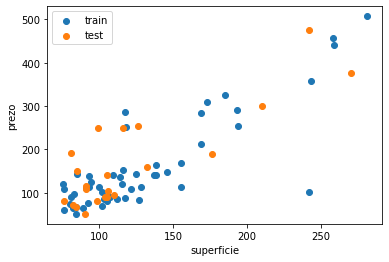

In [5]:
import matplotlib.pyplot as plt  # Importamos a libraría (isto sólo é necesario facelo unha vez)

# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter de train
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'], label='train')

# Debuxamos o scatter de test
ax.scatter(vivendas_test['superficie'], vivendas_test['prezo'], label='test')

ax.legend()  # Facemos que se mostren as labels

plt.show()

Agora deberemos dividir os conxuntos en variables preditoras (`vivendas_train_X` e `vivendas_test_X`) e variables dependentes (`vivendas_train_Y` e `vivendas_test_Y`):

In [6]:
### COMPLETA O SCRIPT ###
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']
vivendas_test_X = vivendas_test.loc[:, :'superficie'].astype(float)
vivendas_test_Y = vivendas_test.loc[:, 'prezo']

## Función `MLPRegressor`

Lembremos que unha rede neuronal está formada de tres compoñentes principais: as *neuronas*, as *funcións de activación* de cada unha delas e os *pesos* de cada unha das conexións entre neuronas.

Imos construir a nosa primera rede neuronal empregando a función `MLPRegressor` que proporciona o paquete de `scikit-learn`. Imos empregar a función de activación loxística (ou sigmoidal) `activation='logistic'`. Lembremos que o problema do prezo das vivendas é un problema de **regresión**, no que tomamos como entrada un único valor, a superficie do inmoble, e queremos obter como saída outro valor, o prezo estimado do mesmo. Polo tanto, o tamaño das capas de entrada e saída da rede neuronal que modele o problema será igual a 1, é dicir, bástanos cunha neurona na entrada e outra na saída. Imos empregar tamén unha terceira capa entre a capa de entrada e a capa de saída, o que se coñece como capa oculta, que polo de agora vai ter tres neuronas. Esta rede ten o seguinte aspecto:

![](rede-simple.png "Rede")

Xa podemos empregar a clase `MLPRegressor` para crear a nosa primeira rede. A esta función pasámoslle o número de neuronas na capa oculta con `hidden_layer_sizes`. Ademais podemos fixar un número de iteracións con `max_iter` (por defecto son 200) Con `learning_rate_init=0.0025` lle indicamos canto queremos que se actualicen os pesos en cada iteración (velocidade de aprendizaxe) e con `n_iter_no_change=float('inf')` facemos que continúe o adestramento pese a que o modelo non mellore, pois queremos que alcance o número de iteracións que lle esiximos (esto fará que nos apareza un ***WARNING***, pero non hai que preocuparse). O método de aprendizaxe que empregaremos é `adam` (o cal funciona especialmente ben con moitas iteracións):

In [7]:
from sklearn.neural_network import MLPRegressor  # Importamos a clase (isto sólo é necesario facelo unha vez)

# Definimos o modelo
model_vivendas_1 = MLPRegressor(hidden_layer_sizes=3, max_iter=10000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)

# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_1.fit(vivendas_train_X, vivendas_train_Y)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=3,
             learning_rate_init=0.0025, max_iter=10000, n_iter_no_change=inf,
             random_state=20)

Agora podemos botarlle un ollo aos pesos aprendidos pola rede:

In [8]:
weights = np.concatenate([w.flatten() for sublist in [model_vivendas_1.coefs_, model_vivendas_1.intercepts_] for w in sublist])
weights

array([-1.16661678e-01,  1.93876215e-01,  1.85750432e-01,  4.09958577e-03,
        2.38069168e+01,  2.40041155e+01,  1.59086583e-01,  8.37404003e+00,
        9.06584450e+00,  2.33477783e+01])

> ❓ **_Pregunta 1._**  Por que obtemos 10 pesos se dixemos que a nosa rede ten un total de 5 neuronas? Se non das coa resposta, continúa avanzando, pode que chegues a ela máis adiante.

Si nos ponemos a pensar la estructura de la red neuronal tenemos una neurona en la capa de entrada, tres neuronas en la capa oculta y una neurona en la capa de salida:
    
    La neurona en la capa de entrada tiene tres pesos, uno por cada neurona a la que está conectada de la c. oculta
    
    Las neuronas de la c. oculta tienen un peso cada una para conectar con la neurona de la c. de salida.
    
Con este recuento tenemos seis pesos. Pero no estamos teniendo en cuenta dos neuronas de sesgos([0,1]) que se utilizan para evitar el aprendizaje erróneo:
    
    Una se encuentra en la c. de entrada y por lo tanto genera otros tres pesos(uno por cada neurona de la c.oculta) 
        
    La otra neurona se encuentra en la c. oculta y genera un único peso hacia la neurona situada en la c. de salida. 


Agora predicimos os valores das vivendas do conxunto de test coa axuda da función `predict`:

In [9]:
np.random.seed(SEED_VALUE)
predicions_1 = model_vivendas_1.predict(vivendas_test_X)

Para avaliar as predicións anterirores, recuperamos a función do erro cadrático medio da práctica 3.1:

In [10]:
### Erro cadrático medio ###
def ecm(reais, predicion):
    m = len(reais)  # tamaño do conxunto de datos
    erro = sum((predicion - reais)**2) / (2*m)
    return erro

Calcula o erro cadrático medio das predicións que acabamos de realizar.

In [11]:
### COMPLETA O SCRIPT ###
e_cadratico = ecm(vivendas_test_Y, predicions_1)
print(e_cadratico) #Error cuadrático
print(np.sqrt(e_cadratico)) #Error

10462.630182910192
102.28699909035454


Que che parece este erro? Se lembras os resultados que obtivemos con regresión lineal daraste conta de que as predicións da rede neuronal son moi malas e o ECM moi alto. Bótalle un ollo aos 6 primeiros valores do array de predicións:

In [12]:
predicions_1[:6]

array([71.15881054, 71.1588109 , 71.15881055, 71.15881053, 71.15881055,
       71.15881076])

Algo non funcionou? O que sucede é que nosa rede neuronal non é capaz de xeneralizar o coñecemento. Este fenómeno coñécese como ___underfitting___, ou axuste insuficiente. O *underfitting* pode darse por múltiples causas, como o baixo número de mostras no noso conxunto de adestramento ou a mala elección das características que eliximos para representar o problema. Sen embargo, neste caso o motivo é outro. O rendemento dunha rede neuronal pode verse moi deteriorado se empregamos os datos en bruto sen normalizar. Moitas veces o algoritmo non converxerá antes do número máximo de iteracións permitidas. **Normalizar** non é máis que comprimir ou extender os valores dunha variable para que estén acoutados nun rango desexado. Existen diferentes métodos para normalizar os datos. Neste caso imos empregar o método *min-max* para escalar os datos das variables `superficie` e `prezo` ao rango [0,1]. Simplemente, para cada valor concreto $a_i$ dunha variable $a$, o seu correspondente valor normalizado $z_i$ virá dado por:
$$ z_i = \frac{a_i - \min(a)}{\max(a) - \min(a)} $$

En Python podemos implementar unha función que tome como entradas as mostras (de adestramento e test) dunha variable e nolas devolva escaladas:

In [13]:
### Normalización min-max ###
def norm_min_max(train, test):
    maximo = train.max()
    minimo = train.min()
    z_train = (train - minimo) / (maximo - minimo)
    z_test = (test - minimo) / (maximo - minimo)
    
    return z_train, z_test

Empregando a función anterior, normalizamos o dataset e volvemos a obter os conxuntos de train e test:

In [14]:
vivendas_train_n, vivendas_test_n = norm_min_max(vivendas_train, vivendas_test)
vivendas_train_n

,superficie,prezo
1,0.203883,0.516958
55,0.305825,0.245766
24,0.456311,0.509543
14,0.024272,0.049403
59,0.131068,0.041484
56,0.893204,0.854642
68,0.155340,0.085469
66,0.242718,0.200750
57,0.300971,0.195310
27,1.000000,1.000000


> ❓ **_Pregunta 2._**  Observa detidamente os dous últimos scripts. Por que cres que a función `norm_min_max` trata internamente de distinto xeito os conxuntos de train e test? Cres que poderiamos normalizar a variable primeiro e logo facer a división en subconxuntos adestramento e test? Por que normalizamos de xeito independente cada variable? Non sería máis doado calcular o máximo e o mínimo de todo o dataframe?



Constrúe unha rede neuronal coas mesmas características que a anterior pero empregando os **datos normalizados**. Este modelo chamarase `model_vivendas_2`. **Non esquezas o seed**. (Pista: Comeza por dividir novamente os datos en variables predictoras e dependentes)

In [15]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###
vivendas_train_X_n = vivendas_train_n.loc[:, :'superficie'].astype(float)
vivendas_train_Y_n = vivendas_train_n.loc[:, 'prezo']
vivendas_test_X_n = vivendas_test_n.loc[:, :'superficie'].astype(float)
vivendas_test_Y_n = vivendas_test_n.loc[:, 'prezo']

# Definimos o modelo
model_vivendas_2 = MLPRegressor(hidden_layer_sizes=3, max_iter=10000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)

# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_2.fit(vivendas_train_X_n, vivendas_train_Y_n)





/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=3,
             learning_rate_init=0.0025, max_iter=10000, n_iter_no_change=inf,
             random_state=20)

Fai de novo as predicións dos prezos do conxunto de test e obtén o seu ECM. Lembra que os datos agora están normalizados, polo tanto a predición e o ECM tamén o van estar. Para obter valores que poidamos interpretar en euros, tes que "desnormalizar" as predicións: 
$$ a_i =  z_i \times [\max(a) - \min(a)] + \min(a)  $$

In [16]:
np.random.seed(SEED_VALUE)

predicions_2_n = model_vivendas_2.predict(vivendas_test_X_n)
predicions_2 = (predicions_2_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])

ecm(vivendas_test['prezo'], predicions_2)

2050.7022406953915

O número de capas ocultas que empreguemos así como o número de neuronas en cada unha delas teñen moita influencia na efectividade do noso modelo. Crea agora empregando os **datos normalizados** unha rede cunha capa oculta de **53 neuronas** e mide o seu rendemento. Este modelo chamarase `modelo_vivendas_3`. Fixa o límite de **iteracións a 30000**.

In [17]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###

# Definimos o modelo
model_vivendas_3 = MLPRegressor(hidden_layer_sizes=53, max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)

# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_3.fit(vivendas_train_X_n, vivendas_train_Y_n)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=53,
             learning_rate_init=0.0025, max_iter=30000, n_iter_no_change=inf,
             random_state=20)

In [18]:
np.random.seed(SEED_VALUE)

predicions_3_n = model_vivendas_3.predict(vivendas_test_X_n)
predicions_3 = (predicions_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])

ecm(vivendas_test['prezo'], predicions_3)

3691.951982178667

Se fixeches todo ben, verás que non consegues mellorar as predicións de test aumentando o número de neuronas, senon todo o contrario. Como é isto posible? Imos botarlle un ollo ao axuste que fai o modelo sobre os datos de adestramento.

In [19]:
np.random.seed(SEED_VALUE)

predicions_train_3_n = model_vivendas_3.predict(vivendas_train_X_n)
predicions_train_3 = (predicions_train_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ecm(vivendas_train['prezo'], predicions_train_3)

1041.6727673500811

Observa que o ECM que se comete sobre o conxunto de adestramento é moi baixo, pero cando probamos o modelo con novos datos, este non é capaz de xeneralizar e o erro dispárase. Este fenómeno denomínase *overfitting*, ou sobreaxuste. As redes neuronais teñen unha forte tendencia ao sobreaxuste, o que implica que resultan moi boas atopando relacións nos datos de adestramento pero, pola contra, non son tan efectivas cando se lles presentan datos novos.

O seguinte fragmento de código grafica os axustes das 3 redes que levamos creado ata o de agora. 

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


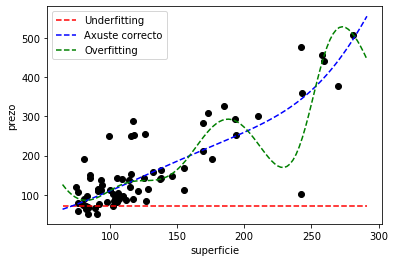

In [20]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas['superficie'], vivendas['prezo'], color='black')

line_x_vals = np.expand_dims(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=100), axis=-1)  # Obtemos unha serie de valores ao longo do eixo X
line_x_vals_n = (line_x_vals - vivendas_train.min()['superficie']) / (vivendas_train.max()['superficie'] - vivendas_train.min()['superficie'])

# Creamos e mostramos o modelo 1
line_y_vals_model_1 = model_vivendas_1.predict(line_x_vals)
ax.plot(line_x_vals, line_y_vals_model_1, '--', color='r', label='Underfitting')

# Creamos e mostramos o modelo 2
line_y_vals_model_2_n = model_vivendas_2.predict(line_x_vals_n)
line_y_vals_model_2 = (line_y_vals_model_2_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ax.plot(line_x_vals, line_y_vals_model_2, '--', color='b', label='Axuste correcto')

# Creamos e mostramos o modelo 3
line_y_vals_model_3_n = model_vivendas_3.predict(line_x_vals_n)
line_y_vals_model_3 = (line_y_vals_model_3_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
ax.plot(line_x_vals, line_y_vals_model_3, '--', color='g', label='Overfitting')


ax.legend()  # Facemos que se mostren as labels

plt.show()  # Mostramos a figura

> ❓ **_Pregunta 3._**  Explica a gráfica anterior, comentando que representan os puntos nas distintas cores, as liñas, etc., e comparando as tres propostas.

Non existe ningunha regra universal ou ecuación que nos permita coñecer o número óptimo de neuronas e capas a empregar nas nosas redes. Habitualmente, unha única capa oculta soe ser dabondo para unha ampla variedade de aplicacións. Polo que respecta ao número de neuronas da(s) capa(s) oculta(s), é habitual que estea entre o tamaño da capa de entrada e o da capa de saída. Típicamente para acadar boas configuracións de parámetros realízanse sucesivos adestramentos variando a arquitectura da rede e avalíanse mediante técnicas como ___cross validation___, que basicamente consisten en realizar o adestramento varias veces, variando o conxunto de datos de adestramento e test, necesario entre outras cousas para detectar cando o axuste é correcto e cando se produce *overfitting*.

## Profundizando no MLP

Agora xa sabemos empregar a función `MLPRegressor` para crear un Multi-layer Perceptron para a regresión de valores. Imos profundizar un pouco máis no seu uso e comprender o que fai.

Empregando a función `plotMLP` imos amosar a rede que entrenamos:

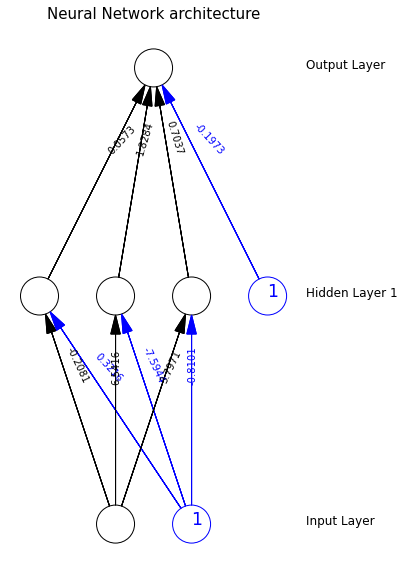

In [21]:
from scikit_plot import plotMLP  # Importamos a libraría (isto sólo é necesario facelo unha vez)

plotMLP(model_vivendas_2, figsize=(10, 10))

> ❓ **_Pregunta 4._**  Que representan os nodos e as frechas en cor azul na figura anterior? Por que teñen un número 1 eses nodos? Revisa a túa resposta da Pregunta 1 se é preciso.

En `MLPRegressor` podemos usar o parámetro `hidden_layer_sizes` non só para indicar o número de neuronas nunha única capa oculta. Se en lugar dun único valor enteiro lle pasamos unha lista de enteiros, a función vai interpretar que desexamos ter tantas capas ocultas como elementos hai na lista. Deste xeito, o primeiro valor do vector indicará o número de neuronas da primeira capa oculta, o segundo o da segunda, etc. Crea agora unha rede neuronal (`model_vivendas_4`) que teña **tres capas ocultas**, de xeito que a primeira delas teña **2 neuronas**, **a segunda 4** e **a terceira 3**. Avalía o modelo e representa gráficamente a rede.

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  warnings.warn(


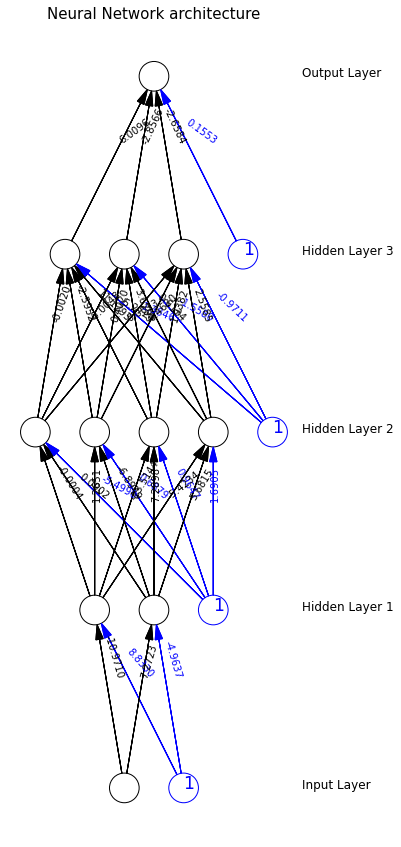

In [22]:
### COMPLETA O SCRIPT (non esquezas o "random_state=SEED_VALUE") e o "np.random.seed" ###

# Definimos o modelo
model_vivendas_4 = MLPRegressor(hidden_layer_sizes=[2,4,3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.0025, n_iter_no_change=float('inf'), random_state=SEED_VALUE)

# Entrenamos a rede
np.random.seed(SEED_VALUE)
model_vivendas_4.fit(vivendas_train_X_n, vivendas_train_Y_n)


plotMLP(model_vivendas_4, figsize=(15, 15))



In [24]:
np.random.seed(SEED_VALUE)

predicions_4_n = model_vivendas_4.predict(vivendas_test_X_n)
predicions_4 = (predicions_4_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])

ecm(vivendas_test['prezo'], predicions_4)

13281.079486804663

O *learning rate* (coeficiente de velocidade de aprendizaxe) determina canto afecta a retropropagación aos pesos en cada iteración. Este coeficiente é equivalente ao $\alpha$ que vimos nas práctica 3.1 de regresión. Nas clases teóricas empregabamos a letra grega $\eta$ para referirnos a el. 

Un *learning rate* elevado implica que durante o adestramento cada iteración pode modificar fortemente os valores dos pesos ou, dito doutro xeito, o algoritmo "aprende" moito de cada un dos exemplos do dataset. Isto tamén significa que un só *outlier* pode afectar seriamente aos valores dos pesos e facer que o algoritmo diverxa e non chegue a un axuste de pesos óptimo. Pola contra, un coeficiente de aprendizaxe baixo significa que o algoritmo "aprende" menos de cada exemplo do dataset, así que a rede neuronal verase menos afectada por *outliers*, aínda que se necesitarán máis exemplos e iteracións para que o algoritmo converxa e se obteña un bo modelo. 

En `MLPRegressor` podemos axustar este coeficiente co parámetro `learning_rate_init`, que ata agora deixamos fixo a `0.0025`. esta función continúa o adestramento ata acadar `max_iter` ou converxer, polo que se empregamos un `learning_rate_init` inapropiado (moi elevado ou moi baixo), `MLPRegressor` non converxerá e amosará un *WARNING* (nos exemplos anteriores sempre se amosaba o *WARNING* porque desactivábamos o *early stopping* mediante `n_iter_no_change=float('inf')`). No seguinte script obtemos dous novos modelos prácticamente idénticos, agás polo *learning rate* empregado. 

In [25]:
import time  # Para medir tempos de execución

## Usando learningrate = 0.001
model_vivendas_5 = MLPRegressor(hidden_layer_sizes=[2, 4, 3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.001, n_iter_no_change=5000, tol=2e-6,random_state=SEED_VALUE)

np.random.seed(SEED_VALUE)

start = time.process_time()
model_vivendas_5.fit(vivendas_train_X_n, vivendas_train_Y_n)
end = time.process_time()

predicions_5_n = model_vivendas_5.predict(vivendas_test_X_n)
predicions_5 = (predicions_5_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
erro_5 = ecm(vivendas_test['prezo'], predicions_5)

print('Tempo de execución con "learning_rate = 0.001": {:.2f}s'.format(end - start))
print('Número de iteracións necesarias: {}'.format(model_vivendas_5.n_iter_))
print('Erro cadrático medio: {}'.format(erro_5))
print()


## Usando learningrate = 0.00018
model_vivendas_6 = MLPRegressor(hidden_layer_sizes=[2, 4, 3], max_iter=30000, activation='logistic', solver='adam',
                                learning_rate_init=0.00018, n_iter_no_change=5000, tol=2e-6,random_state=SEED_VALUE)

np.random.seed(SEED_VALUE)

start = time.process_time()
model_vivendas_6.fit(vivendas_train_X_n, vivendas_train_Y_n)
end = time.process_time()

predicions_6_n = model_vivendas_6.predict(vivendas_test_X_n)
predicions_6 = (predicions_6_n * (vivendas_train.max()['prezo']-vivendas_train.min()['prezo']) + vivendas_train.min()['prezo'])
erro_6 = ecm(vivendas_test['prezo'], predicions_6)

print('Tempo de execución con "learning_rate = 0.00018": {:.2f}s'.format(end - start))
print('Número de iteracións necesarias: {}'.format(model_vivendas_6.n_iter_))
print('Erro cadrático medio: {}'.format(erro_6))

Tempo de execución con "learning_rate = 0.001": 4.79s
Número de iteracións necesarias: 7257
Erro cadrático medio: 1998.7191216475017

Tempo de execución con "learning_rate = 0.00018": 8.84s
Número de iteracións necesarias: 13756
Erro cadrático medio: 1893.7682135018667


> ❓ **_Pregunta 5._**  Fíxate nos tempos de execución do adestramento, número de iteracións e ECM de cada un dos modelos do script anterior. Comenta os resultados xustificando as diferenzas.

``` python
Tempo de execución con "learning_rate = 0.001": 2.44s
Número de iteracións necesarias: 7257
Erro cadrático medio: 1998.7191216475017

Tempo de execución con "learning_rate = 0.00018": 4.28s
Número de iteracións necesarias: 13756
Erro cadrático medio: 1893.7682135018667
```

# Recoñecemento de díxitos

No seguinte exercicio imos abordar un problema de **clasificación**. Lembra que, a diferenza da regresión, a clasificación consiste en predicir unha clase, é dicir, un valor discreto, non continuo. Recorda que xa fixemos clasificación nas prácticas de CLIPS onde definiamos regras de decisión para diferenciar, por exemplo, distintos animais en base á súa taxonomía. Agora imos empregar un dataset significativamente máis grande que o anterior das vivendas (aínda que segue sendo moi pequeno se o comparamos cos tamaños que se manexan na actualidade). O novo dataset chámase `dixitos.csv` e contén imaxes de díxitos escritos a man por distintas persoas, logo o que pretendemos é obter un modelo que sexa capaz de predicir o díxito en cuestión en base a un conxunto de variables de entrada. En total existen 10 díxitos no sistema decimal, porén teremos que distinguir entre 10 clases distintas.

Comezamos como sempre cargando o dataset:

In [ ]:
dixitos = pd.read_csv('dixitos.csv',
                       delimiter=',',
                       header=None)

Imos ver as súas dimensións

In [ ]:
dixitos.shape

In [26]:
dixitos.iloc[:, 0:1].astype("category")

,0
0,7
1,2
2,1
3,0
4,4
...,...
1995,0
1996,6
1997,3
1998,9


In [ ]:
dixitos.values

Co cal temos 2000 imaxes de díxitos representados por 784 variables, xa que a variable restante é a etiqueta que nos indica a que clase pertence cada exemplo, tomando valores discretos do 0 ao 9. Cada unha das 784 variables de entrada representa un valor de intensidade, de xeito que podemos ver o conxunto coma unha matriz de 28x28 píxeles, que codifican cada unha das imaxes de díxitos en escala de grises.

Co que sabemos ata aquí podemos intuir xa que a nosa rede neuronal vai ter na capa de entrada 784 variables pero, que sucede coa capa de saída? Como podemos codificar a saída para que nos diga a que clase pertence un díxito? Sendo un problema de clasificación onde diferenciamos 10 clases distintas, parece lóxico que na capa de saída haxa 10 neuronas, unha por clase (isto falo automáticamente a clase `MLPClassifier` cando definimos a saída coma un tipo `category`).
 
As seguintes funcións realizan algunhas tarefas necesarias de preprocesado: a normalización do dataset e a codificación da saída. Toma un tempo para analizalas con calma.

In [28]:
## Función de preprocesado do dataset
def preprocesar_dixitos(df):
    # Tomamos as 784 variables de entrada
    df_X = df.iloc[:, 1:]
    # Normalizamos os seus valores
    df_X = norm_num(df_X)
    
    # Tomamos a variable de saida
    df_Y = df.iloc[:, 0:1]
    # Convertímola ao tipo de dato category (pois son etiquetas que poden tomar un número delimitado de valores)
    df_Y = df_Y.astype("category")
    # Renomeamos a columna
    df_Y.columns = ['label']
    
    # Xuntamos as novas entradas normalizadas coas novas saídas codificadas
    novo_df = pd.concat([df_X, df_Y], axis=1)
    
    return novo_df

# Función para aplicar de a normalización
def norm_num(df):
    columnas_numericas = list(df.select_dtypes(include=[np.number]).columns.values)
    if len(columnas_numericas) > 0:
        # Aplicamos unha normalizacion min-max, coa diferencia de que xa sabemos que os valores van de [0, 255]
        df.loc[:, columnas_numericas] = df.loc[:, columnas_numericas] / 255.0

    return df

Imos aplicar ese preprocesado ao dataset e dividilo nos habituais conxuntos de adestramento e test:

In [29]:
dixitos_proc = preprocesar_dixitos(dixitos)

np.random.seed(SEED_VALUE)
dixitos_train, dixitos_test = train_test_split(dixitos_proc, test_size=0.3, random_state=SEED_VALUE)

dixitos_train_X = dixitos_train.loc[:, dixitos_train.columns != 'label']
dixitos_train_Y = dixitos_train.loc[:, 'label']

dixitos_test_X = dixitos_test.loc[:, dixitos_test.columns != 'label']
dixitos_test_Y = dixitos_test.loc[:, 'label']

print(dixitos_train.shape)
print(dixitos_test.shape)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


(1400, 785)
(600, 785)


Estamos listos para adestrar un novo modelo, pero primeiro imos visualizar un exemplo calquera do dataset para rematar de comprender que aspecto ten o conxunto de datos.

In [30]:
fila_exemplo = 0  # Podes cambiar este número pola fila que desexes consultar

exemplo = dixitos_train.iloc[fila_exemplo:fila_exemplo+1] 
exemplo

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,label
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Este díxito debería corresponderse co seguinte número:

In [31]:
exemplo['label']

710    5
Name: label, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

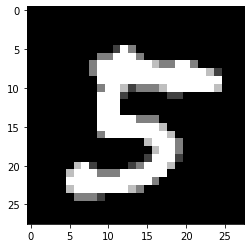

In [32]:
exemplo_values = exemplo.loc[:, exemplo.columns != 'label'].values
l = int(np.sqrt(exemplo_values.shape[1]))

exemplo_img = np.reshape(exemplo_values, [l, l])

plt.imshow(exemplo_img, cmap='gray', vmin=0, vmax=1.0)

Imos construir a rede. Lembra que xa estamos traballando con dimensións respetables de datos, polo que o adestramento non vai ser instantáneo, ten paciencia porque pode que tarde un pouco (1-2 minutos como moito).

In [33]:
from sklearn.neural_network import MLPClassifier

model_dixitos = MLPClassifier(hidden_layer_sizes=[20, 20, 20], max_iter=30000, activation='relu', solver='adam',
                              learning_rate_init=0.01, n_iter_no_change=1000, tol=1e-6, random_state=SEED_VALUE)


np.random.seed(SEED_VALUE)

start = time.process_time()
model_dixitos.fit(dixitos_train_X, dixitos_train_Y)
end = time.process_time()
print('Tempo de adestramento": {:.2f}s'.format(end - start))

Tempo de adestramento": 994.27s


> ❓ **_Pregunta 6._**  Observa o script anterior. Cantas capas ten a rede (entrada, ocultas e saída), e con cantas neuronas cada unha? Como definimos o tamaño de cada unha delas?

Facemos a predición sobre o conxunto de test:

In [ ]:
np.random.seed(SEED_VALUE)
dixitos_test_pred = model_dixitos.predict_proba(dixitos_test_X)

Observa a apariencia que teñen as predicións obtidas:

In [ ]:
dixitos_test_pred.shape

Tomemos de exemplo a primeira predición do conxunto de test:

In [ ]:
fila_exemplo = 0  # Podes cambiar este número pola fila que desexes consultar

exemplo = dixitos_test_pred[fila_exemplo] 
exemplo

for i, c in enumerate(model_dixitos.classes_):
    print('{}: {:.2f}%'.format(c, exemplo[i]*100))

No caso anterior parece que a rede cre ao 63% que ese díxito se trata dun 8, xa que da un valor de 0.6301 no segundo elemento do vector de saída (percátate de que no print anterior estamos a multiplicar a saída por 100). Vexamos cal é o seu valor real:

In [ ]:
exemplo_test_Y = dixitos_test_Y.iloc[fila_exemplo:fila_exemplo+1]
exemplo_test_X = dixitos_test_X.iloc[fila_exemplo:fila_exemplo+1] 

exemplo_test_values = exemplo_test_X.loc[:, exemplo_test_X.columns != 'label'].values
exemplo_test_img = np.reshape(exemplo_test_values, [l, l])

plt.imshow(exemplo_test_img, cmap='gray', vmin=0, vmax=1.0)
print('Valor real: {}'.format(exemplo_test_Y.values))

Efectivamente, un 8. En regresión empregábamos o erro cadrático medio para estimar a calidade das predicións pero, como podemos facer isto nun problema de clasificación? Unha medida moi sinxela pero amplamente empregada é a ___accuracy___, ou **taxa de acerto**: 
$$ Accuracy = \frac{\text{nº de acertos}}{\text{nº de predicións}} $$

Primeiro, convertimos os vectores de predicións que obtivemos a un único valor. Para cada predición quedámonos co díxito que obtén un maior valor (isto xa o faría automáticamente a función `.predict()`):

In [ ]:
dixitos_test_pred_label = model_dixitos.classes_[np.argmax(dixitos_test_pred, axis=-1)]
dixitos_test_pred_label[:6]

Nos seguites dous scripts calculamos a *accuracy*:

In [ ]:
coincidencias = dixitos_test_pred_label == dixitos_test_Y
acertos = sum(coincidencias)
acertos

In [ ]:
total = len(dixitos_test_Y) 
accuracy = acertos / total
accuracy

> ❓ **_Pregunta 7._**  Explica cal é o contido das variables `coincidencias`, `acertos` e `total`. Que significa obter unha *accuracy* de 0.88, ou do 88%?

Finalmente, podemos ver unha matriz de confusión entre os valores reais e as predicións do seguinte xeito:

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_dixitos, dixitos_test_X, dixitos_test_Y, ax=ax)
disp.figure_.suptitle("Matriz de confusión")

plt.show()

> ❓ **_Pregunta 8._**  Cales son as conclusións máis relevantes que se poden extraer da matriz anterior?

**************************************************************

# Respostas ao cuestionario (10 puntos)

**LEMBRA:** Non esquezas de escribir teu nome e apelidos na segunda celda do presente documento.

❓ **_Pregunta 1._  Por que obtemos 10 pesos se dixemos que a nosa rede ten un total de 5 neuronas? Se non das coa resposta, continúa avanzando, pode que chegues a ela máis adiante.**

Si nos ponemos a pensar la estructura de la red neuronal tenemos **una neurona en la capa de entrada, tres neuronas en la capa oculta y una neurona en la capa de salida:**

    La neurona en la capa de entrada tiene **tres pesos**, uno por cada neurona a la que está conectada de la c. oculta

    Las neuronas de la c. oculta tienen **un peso cada una** para conectar con la neurona de la c. de salida.
   
Con este recuento tenemos seis pesos. Pero no estamos teniendo en cuenta **dos neuronas de sesgo([0,1])** que se utilizan para evitar el aprendizaje erróneo:

    Una se encuentra en la c. de entrada y por lo tanto genera otros **tres pesos**(uno por cada neurona de la c.oculta) 
    
    Otra neurona se encuentra en la c. oculta y genera **un único peso** en dirección a la neurona situada en la c. de salida. 

De esta forma tenemos un total de 10 pesos.

❓ **_Pregunta 2._ Observa detidamente os dous últimos scripts. Por que cres que a función `norm_min_max` trata internamente de distinto xeito os conxuntos de train e test? Cres que poderiamos normalizar a variable primeiro e logo facer a división en subconxuntos adestramento e test? Por que normalizamos de xeito independente cada variable? Non sería máis doado calcular o máximo e o mínimo de todo o dataframe?**

**La función `norm_min_max` trata internamente de forma diferente al conjunto de datos prueba con respecto al conjunto de datos entrenamiento.** Primero debemos entender la intención con la que dividimos el dataset en nuestro problema. El conjuntos de entrenamiento se emplea para entrenar a la neurona y que nos devuelva así predicciones con el menor coste posible. Sin embargo, el conjunto de datos prueba se usa para comprobar si las predicciones que realiza la neurona ya entrenada calcula predicciones lo suficientemente correctas. 

Con todo esto la normalización se usa para poder entrenar a la neurona y evitar ajustes incorrectos.Además una vez tenemos la red neuronal completamente entrenada le daremos datos de entrada normalizados para que nos devuelva una predicción correcta, los datos de entreda de prueba y que se usen en el futuro deben pasar por el mismo preprocesado/normalización que los datos de entrenamiento.

**Con respecto a la pregunta de si debemos normalizar todo el dataset** y posteriormente realizar la división, la respuesta es no ya que primero debemos saber que datos pertecen al conjunto de datos de entrenamiento, ya que la normalización se porduce con su máximo y mínimo y si lo realizamos antes no sabemos dichos valores o los tomamos de forma incorrecta porque podríamos tomar un dato como máximo que a futuro este en el conjunto de datos de prueba.

**La normalización se produce sobre el dataset completo, pero sobre cada una de las variables de forma independiente.** Esto es algo obvio, ya que no tiene sentido normalizar la variable superficie tomando el máximo y mínimo de la variable precio. Estas son variables totalmente distintas e independientes, se debe calcular el máximo y mínimo de cada una de ellas y realizar la correspondiente normalización.



❓ **_Pregunta 3._ Explica a gráfica anterior, comentando que representan os puntos nas distintas cores, as liñas, etc., e comparando as tres propostas.**

**Los puntos** representan los datos, no normalizados, del dataset de viviendas.

**La línea roja** representa un infraajuste, esto deriva de que la red neuronal no es capaz de encontrar un resultado para el conjunto de testeo, ya que no se ha entrenado de forma correcta a la red neuronal por la falta de normalización del conjunto de datos de entrenamiento.

**La línea verde** representa un sobreajuste, esto deriva de que a la hora de entrenar la red neuronal se entrena fuertemente, es decir, se reduce el ECM de forma muy significativa(utilizando muchas neuronas en la capa oculta[53] y un número alto de iteracciones), pero limita la adaptación de la red neuronal al introducir nuevos datos de testeo. 

**La línea azul** representa un buen ajuste del modelo, dejando claro que no es necesario la utilización de númerosas neurosas o iteracciones que producirián un sobreajuste y que debemos realizar una normalización del conjunto de datos de entrenamiento para evitar infraajustes y así un mal ajuste de la red neuronal.

❓ **_Pregunta 4._ Que representan os nodos e as frechas en cor azul na figura anterior? Por que teñen un número 1 eses nodos? Revisa a túa resposta da Pregunta 1 se é preciso.**

Los nodos de color azul son neuronas de sesgo[0,1] y las flechas en azul que salen de estas son los pesos asociados a dichas neuronas. Las neuronas de sesgo tienen un uno para espeficiar cual va a ser su valor de entrada de forma constante, en este caso un 1. Estas tienen su utilidad en evitar un aprendizaje erróneo. Dado que la función para cada una de las neuronas viene dada por el sumatorio de sus entradas por el peso de cada entrada, de este modo la neurona de sesgo siempre produciría el propio peso(1 * P = P).Si lo vemos en dos dimensiones podríamos deducir que una neurona de sesgo ayuda a ajustar el modelo variando el termino independiente n(y = xm + n).



❓ **_Pregunta 5._ Fíxate nos tempos de execución do adestramento, número de iteracións e ECM de cada un dos modelos do script anterior. Comenta os resultados xustificando as diferenzas.**

``` python
Tempo de execución con "learning_rate = 0.001": 2.44s
Número de iteracións necesarias: 7257
Erro cadrático medio: 1998.7191216475017

Tempo de execución con "learning_rate = 0.00018": 4.28s
Número de iteracións necesarias: 13756
Erro cadrático medio: 1893.7682135018667
```

El **learning_rate afecta directamente en el ajuste de los pesos de una red neuronal**, cuanto mayor sea mayor ajuste(los valores atípicos perjudican más al modelo). Por otro lado, un menor valor para learning_rate implica la necesidad de más datos para ajustar el modelo y un mayor número de iteracciones. En este caso se compara un learning_rate de **0.001 vs 0.00018**.

Con un learning_rate 0.001 tenemos un menor número de iteracciones y menor tiempo de ejecución, pero con respecto al ajuste del modelo, si comparamos el error cuadático medio, es menor usando un learning_rate de 0.00018 obteniendo una mejor predicción.

❓ **_Pregunta 6._ Observa o script anterior. Cantas capas ten a rede (entrada, ocultas e saída), e con cantas neuronas cada unha? Como definimos o tamaño de cada unha delas?**

En la red tenemos **cinco capas: capa de entrada, tres capas ocultas y una capa de salida.**

**Capa de entrada:** La establece de forma automática la clase MLPClassifier cuando le introducimos como entrada un conjunto con 784 variables de entrada.

**Capas ocultas:** En el atributo **`hidden_layer_sizes`** del contructor de la clase MLPClassifier se especifica una lista de tres elementos [20,20,20]. Tendremos tres capas ocultas con veinte neuronas cada una.

**Capas de saldia:** La establece de forma automática la clase MLPClassifier al establecer la salida como un "category" en la función **`preprocesar_dixitos`** 

``` python
# Tomamos a variable de saida
df_Y = df.iloc[:, 0:1]
# Convertímola ao tipo de dato category (pois son etiquetas que poden tomar un número delimitado de valores)
df_Y = df_Y.astype("category")
# Renomeamos a columna
df_Y.columns = ['label']
```

❓ **_Pregunta 7._ Explica cal é o contido das variables `coincidencias`, `acertos` e `total`. Que significa obter unha *accuracy* de 0.88, ou do 88%?**

**`coincidencias:`** Es una variable de tipo booleano que devuelve true si la predicción hecha por la red neuronal coincide con la categoría especificada en el fichero "dixitos.csv"

**`acertos:`** Es una variable con rol de contador que aumenta en función al número de veces que coincidencias==true sobre todo el conjunto de pruebas.

**`total:`** Es una variable que contiene el número total de elementos que estan en el conjunto de pruebas.(dixitos_test_Y)

**Una precisión del 88% significa que de cada 100 datos, la red neuronal predice de forma correcta 88 y solo erra en 12.**

❓ **_Pregunta 8._ Cales son as conclusións máis relevantes que se poden extraer da matriz anterior?**

**La matriz de confusión de forma gráfica ayuda a sacar conclusiones finales sobre la predicción de números por parte de la red neuronal. Además, permite saber entre que dos números se comenten predicciones erróneas y trabajar sobre ellas para mejorar la red neuronal. **

En nuestro ejemplo vemos que la **mayoría de predicciones son correctas**. Pero cuando estas son **erróneas, se producen de forma más destacada entre:(REAL, PREDICCIÓN) (9,4), (3,5), (2,6), (9,7).** En estas parejas se ha equivocado en su predicción hasta cuatro veces por pareja. 


**************************************************************